<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://matplotlib.org/

https://pandas.pydata.org/

http://www.numpy.org/

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

## Bibliotecas opcionais

https://docs.python.org/3/library/warnings.html

In [2]:
import warnings

#método para ignorar avisos durante as execuções de células.
warnings.filterwarnings('ignore')

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [3]:
#Abrindo a base de dados, temos:
base_dados  = pd.read_csv('Consumo_cerveja.csv',sep = ';')
base_dados.head(10)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
5,06/01/2015,23.78,20.1,30.5,12.2,0,28218
6,07/01/2015,24.00,19.5,33.7,0.0,0,29732
7,08/01/2015,24.90,19.5,32.8,48.6,0,28397
8,09/01/2015,28.20,21.9,34.0,4.4,0,24886
9,10/01/2015,26.76,22.1,34.2,0.0,1,37937


## Visualizar os dados

In [4]:
base_dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


## Verificando o tamanho do dataset

In [5]:
base_dados.shape

(365, 7)

Portanto, temos 365 dados e 7 variáveis. Cada dados corresponde a um dia.

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [6]:
#Fazendo a análise descritiva do conjunto de dados, temos:
base_dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


O objetivo dessa análise descritiva preliminar é tentar encontrar comportamentos esquisitos no conjunto de dados. Então, nesse procedimento avaliamos, por exemplo, as temperaturas máximas e mínimas. Note que a menor temperatura máxima registrada em um dia é de 14,5 °C e a maior temperatura máxima diária registrada é de 36,5. Tais valores de temperatura são razoáveis, quando considerado a região onde foram coletados. Caso tivéssemos temperaturas como 100°C, por exemplo, poderíamos desconfiar que tais dados são registros errados de temperaturas. Para visualizar dados cujo significado físico é irreal, devemos fazer uma análise preliminar de estatísticas descritivas para cada variável.

Quando utilizamos regressão linear, o primeiro passo da análise consiste em verificar relações lineares entre as variáveis. Para isso utilizamos a matriz de correlação.

## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

Para visualizar a matriz de correlação, que exibe o coeficiente de correlação entre as variáveis, utilizamos a função ".corr()" do Pandas. Mais informações sobre o método podemos acessar a seguinte página: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [7]:
base_dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


Note que na diagonal estamos associando uma variável com ela mesma, por este motivo o coeficiente de correlação na diagonal é igual 1, pois há uma associação positiva perfeita.

Fazendo uma análise da matriz de correlação é possível notar que há uma boa correlação entre temperatura máxima diária e consumo de cerveja (coeficiente de correlação = 0,6427). Além disso, há uma boa correlação entre consumo e final de semana, de modo que nos finais de semana há uma tendência de aumento no consumo de cerveja. Por fim, a correlação entre consumo e chuva (precipitação em mm) apresenta uma correlação negativa, de forma que em dias de chuva é observado uma pequena diminuição no consumo de cerveja. 

Quando trabalhamos com algoritmos de aprendizado de máquina precisamos definir os atributos previsores (ou atributos explicativos) e a variável alvo. A partir de uma análise preliminar da matriz de correlação, as variáveis 'temp_max', 'fds' e 'chuva' podem ser usadas como variáveis explicativas. Apesar das variáveis 'temp_media' e 'temp_min' apresentarem boa correlação com a variável objetivo 'consumo', há uma grande correlação entre 'temp_media' e 'temp_min', de modo que devemos evitar tais situações, pois se torna desncessário e pode atrapalhar o funcionamento do algoritmo. As variáveis 'temp_media', 'temp_min' e 'temp_max' estão correlacionadas entre si, de modo que só uma das variáveis foi escolhida como variável explicativa.

Por fim, podemos verificar que as correlações entre as variáveis escolhidas como atributos explciativos são baixas. Temos as seguintes correlações entre as variáveis explicativas:

1. temp_max e chuva: -0.0493
2. temp_max e fds: -0.0403
3. chuva e fds: 0.0016

Portanto, é preferível que as correlações lineares entre as variáveis explicativas sejam baixas para utilização de modelos de regressão linear.


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

## Plotando a variável *dependente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

Como os dados de consumo são séries temporais, uma vez que os dados foram coletados diariamente ao longo do ano de 2015, podemos construir um gráfico para avaliar o comportamento da variável 'consumo' ao longo do ano.

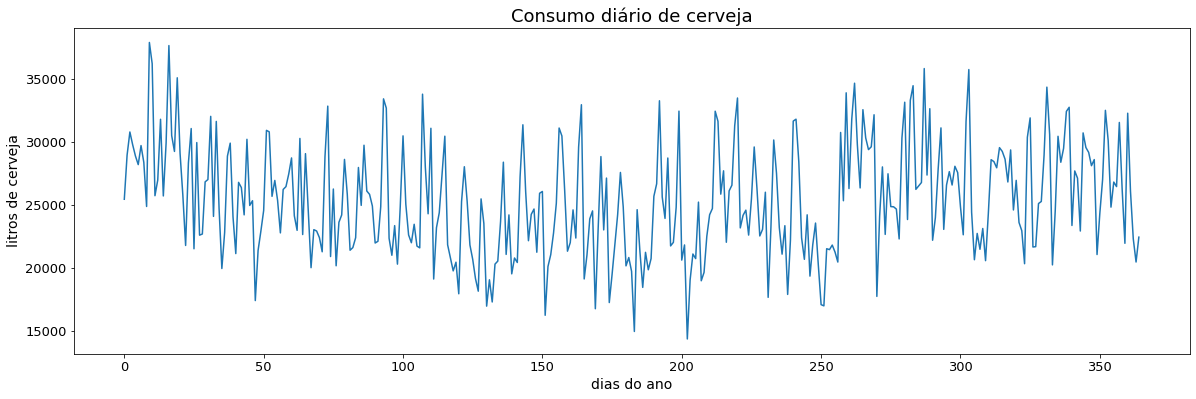

In [8]:
#criando o objeto plt.subplots com tamanho de figura pré-definido
fig, ax = plt.subplots(figsize = (20,6))

#configurando um título para o gráfico
ax.set_title('Consumo diário de cerveja', fontsize = 18)
#configurando a legenda do eixo x
ax.set_xlabel('dias do ano', fontsize = 14)
#configurando a legenda do eixo y
ax.set_ylabel('litros de cerveja', fontsize = 14)

ax = base_dados['consumo'].plot(fontsize = 13)

# <font color='red' style='font-size: 30px;'>Box Plot</font>
<hr style='border: 2px solid red;'>

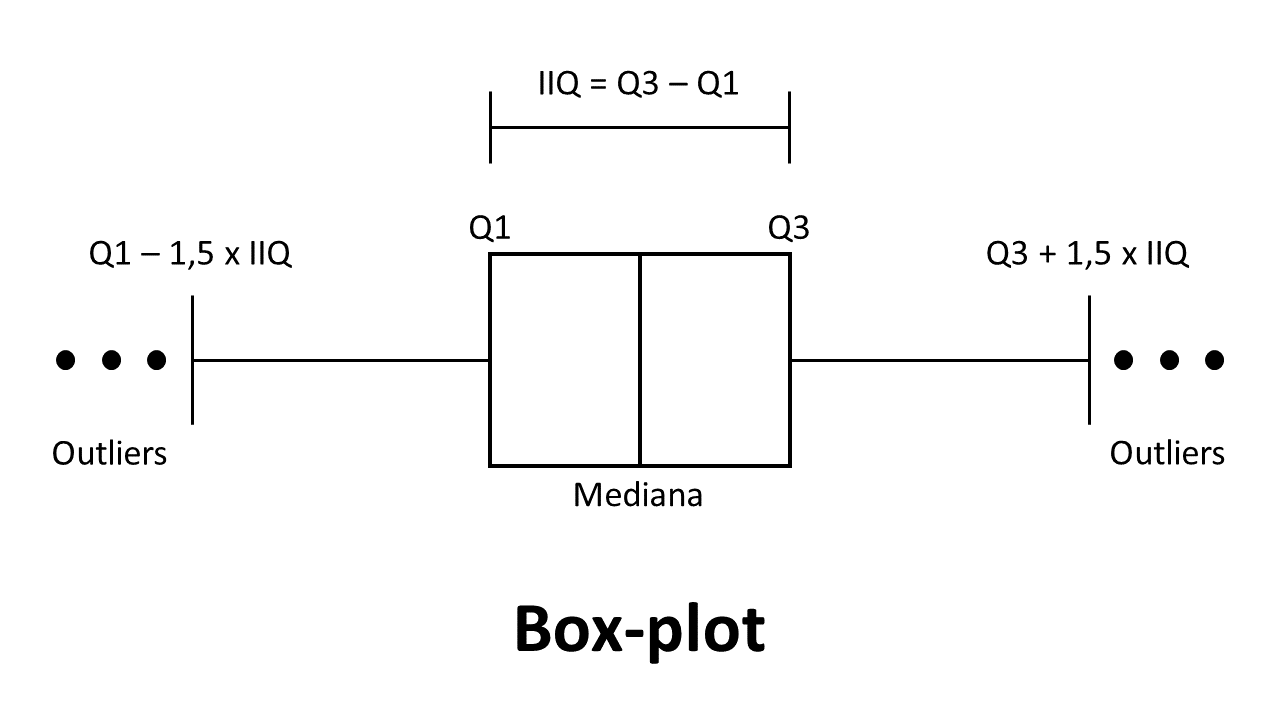

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [9]:
import seaborn as sns

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

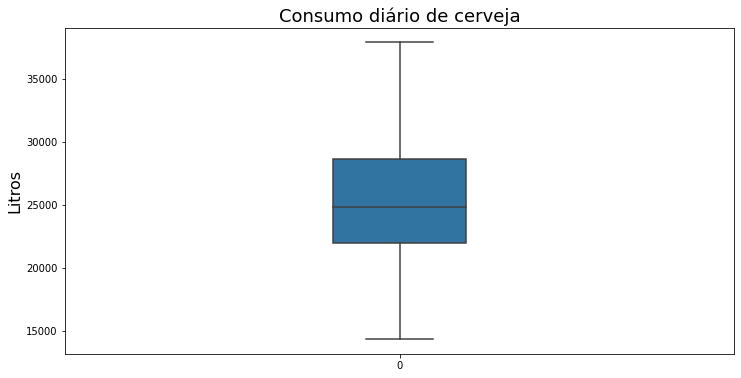

In [10]:
ax = sns.boxplot(data = base_dados['consumo'], orient = 'v', width = 0.2)
ax.figure.set_size_inches(12,6)
#configurando um título para o gráfico
ax.set_title('Consumo diário de cerveja', fontsize = 18)
#configurando a legenda do eixo y
ax.set_ylabel('Litros', fontsize = 16)
ax

No boxplot acima podemos visualizar o comportamento dos dados de consumo de cerveja. Note que os dados estão bem comportados, os dados estão bem distribuídos e não há valores discrepantes, ou seja, valores de outliers. Além disso, o gráfico é aproximadamente simétrico.

# <font color='red' style='font-size: 30px;'>Box Plot com Duas Variáveis</font>
<hr style='border: 2px solid red;'>

## Investigando a variável *dependente* (y) segundo determinada característica

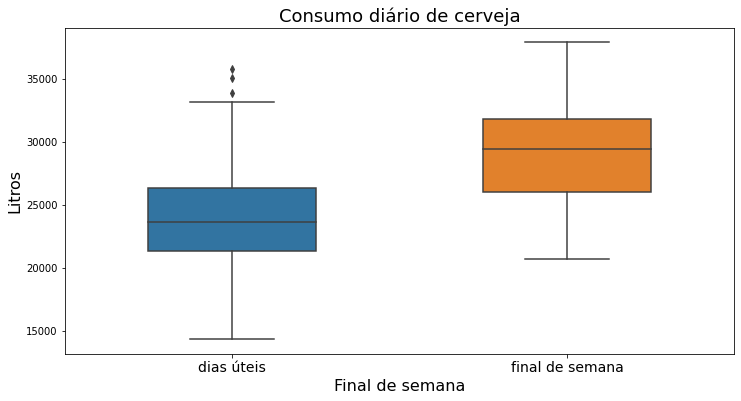

In [11]:
ax = sns.boxplot(y = 'consumo', x ='fds',data = base_dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12,6)
#configurando um título para o gráfico
ax.set_title('Consumo diário de cerveja', fontsize = 18)
#configurando a legenda do eixo y
ax.set_ylabel('Litros', fontsize = 16)
#configurandoa legenda do eixo
ax.set_xlabel('Final de semana',fontsize = 16)
#configurando os labels do eixo x
ax.set_xticklabels(labels = ['dias úteis','final de semana'], fontsize = 14)
ax

Os boxplots apresentam a distribuição de dados para duas características diferentes: dias úteis e finais de semana. Queremos comparar o consumo durante os dias úteis com o consumo nos finais de semana, para isso utilizamos o boxplot construído acima. A partir do boxplot podemos concluir que durante os finais de semana o consumo de cerveja tende a ser maior. Essa conclusão é razoável, uma vez que durante a semana as pessoas trabalham e/ou estudam e tendem a não beber, enquanto nos finais de semanas as pessoas tendem a sair, se divertir, acompanhar jogos de futebol, elevando o consumo de cerveja. Além disso, no boxplot dos dias úteis há a presença de valores discrepantes. Os valores discrepantes não são dados errados, podemos investigar em quais dias ocorreram consumos de cerveja muitos altos para o padrão de dias úteis e identificar o que ocorreu nesses dias. Em feriados, carnavais, etc. pode haver maior consumo de cerveja, podendo explicar tais consumos elevados.

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

Agora, vamos construir um histograma com a nossa variável dependente para verificar se a distribuição dos dados é aproximadamente normal. Tal análise é importante, pois os modelos de regressão linear assumem, inicialmente, que a variável dependente segue uma distribuição normal.

Neste momento, vamos utilizar apenas a inspeção visual da distribuição dos dados, utilizando histogramas, para verificar se os dados são normalmente distribuídos. Nem sempre podemos confiar apenas na inspeção visual para concluir se os dados são normalmente distribuídos ou não. Em casos onde a condição de distribuição normal deve ser estritamente exigida, é necessário utilizar métodos formais para tirar tal conclusão.

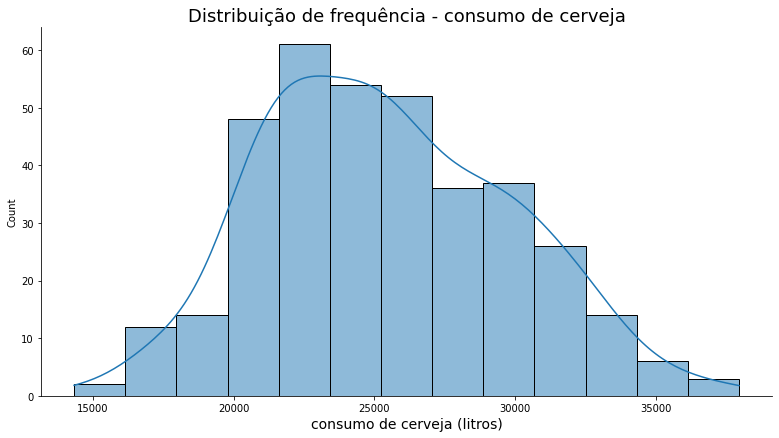

In [12]:
#Construindo um histograma para observação da distribuição dos dados de consumo de cerveja:
ax = sns.displot(data = base_dados['consumo'],kind = 'hist',kde = True)
ax.figure.set_size_inches(12,6)
plt.title('Distribuição de frequência - consumo de cerveja', fontsize = 18)
plt.xlabel('consumo de cerveja (litros)', fontsize = 14)
ax

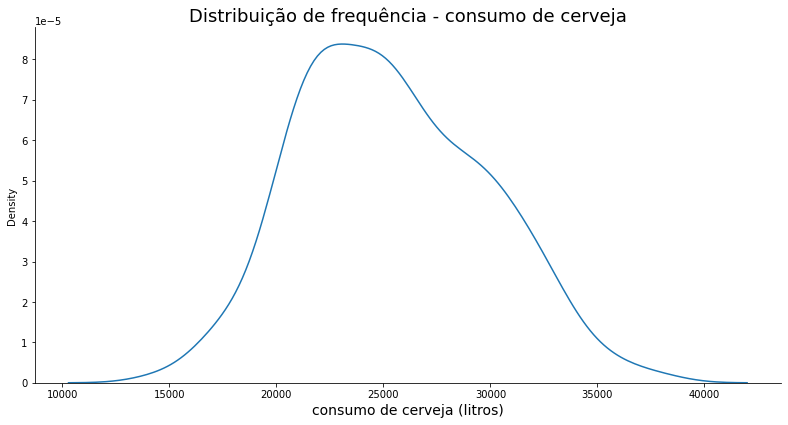

In [13]:
#Construindo uma curva de densidade para observação da distribuição dos dados de consumo de cerveja:
ax = sns.displot(data = base_dados['consumo'],kind = 'kde')
ax.figure.set_size_inches(12,6)
plt.title('Distribuição de frequência - consumo de cerveja', fontsize = 18)
plt.xlabel('consumo de cerveja (litros)', fontsize = 14)
ax

Como podemos ver a partir do histograma construído e da curva de densidade, os nossos dados são aproximadamente normais. Para o nosso caso, vamos admitir que os dados seguem uma distribuição aproximadamente normal, no entanto, para casos mais rígidos, é necessário o uso de métodos formais para testar a normalidade da distribuição dos dados. Talvez fosse necessário coletar mais dados para verificar a distribuição dos dados, tendo em vista que temos apenas 365 dados. Ou, então, poderíamos transformar os dados ou utilizar outros métodos de tratamento da variável que fizesse ela se aproximar mais de uma distribuição normal de dados.

Nas próximas seções, continuaremos a fazer análises gráficas para comparar variável dependente e variável explicativa, de modo a determinar se existe relação linear entre as variáveis explicativas e dependente ou não.

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

Nesse momento, queremos verificar se há uma relação linear entre a variável dependente 'consumo' e as variáveis explicativas. O método 'sns.pairplot' é uma espécie de gráfico de dispersão. Os dados são plotados em pares.

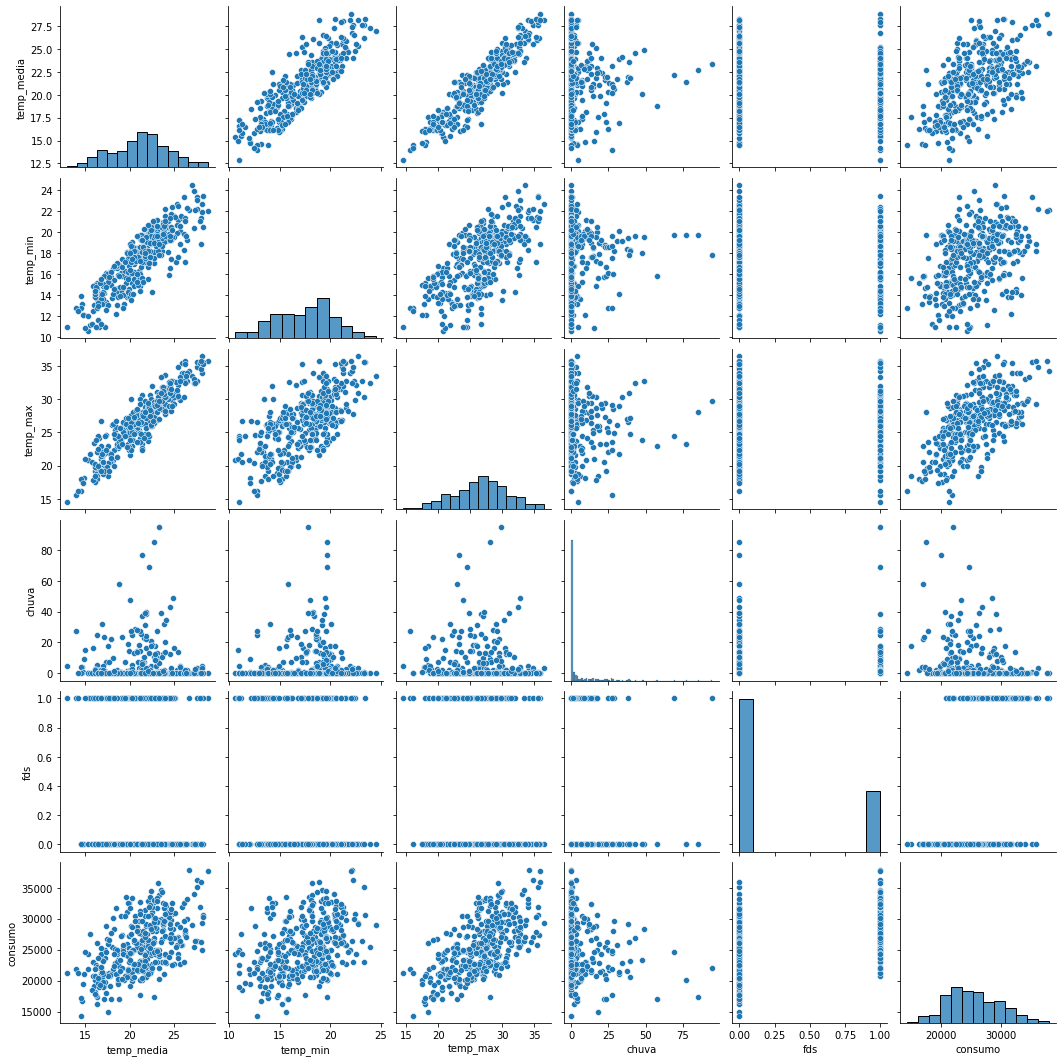

In [14]:
#plotando os gráficos de dispersão, temos:
ax = sns.pairplot(base_dados)

Note que temos a comparação entre todas as variáveis. Caso tenhamos um conjunto de dados muito grande, o uso desse método pode se tornar invivável, sendo necessário o emprego de outros métodos para verificar a relação linear entre as variáveis explicativas e variável dependente. Como temos um conjunto de dados pequeno, com 365 dados e 7 variáveis, podemos utilizar o 'sns.pairplot' sem maiores problemas.

## Plotando o pairplot fixando somente uma variável no eixo y

Como estamos interessados apenas em verificar se há uma relação linear entre a variável dependente 'consumo' e as variáveis explicativas, vamos configurar o pairplot pra exibir apenas a relação entre 'consumo' e as demais variáveis.

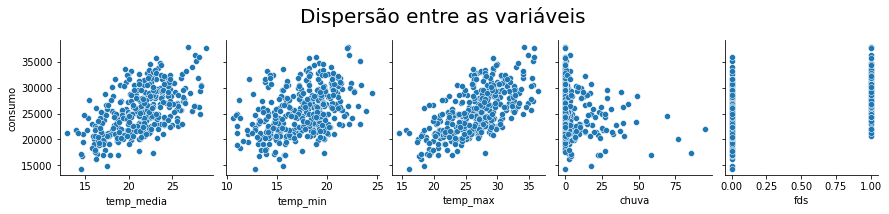

In [15]:
#plotando os gráficos de dispersão, temos:
ax = sns.pairplot(base_dados, y_vars = 'consumo',x_vars = ['temp_media','temp_min','temp_max','chuva','fds'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.15)
ax

Analisando os gráficos de dispersão, é possível visualizar que há uma correlação linear entre as variáveis 'temp_media', temp_min', temp_max' e a variável 'consumo'. Podemos até imaginar uma linha de regressão onde os dados se ajustam. A relação entre a variável 'chuva' e a variável 'consumo' apresenta uma predominância de dados próximo ao 0, uma vez que não são todos os dias que chovem. Também é possível verificar uma tendência de diminuição do consumo de cerveja em dias chuvosos, tal tendência é refletida no coeficiente de correlação negativo entre ambas as variáveis. Ainda comparando as variáveis 'temp_media', 'temp_min' e 'temp_max', apesar das três variáveis apresentarem correlação linear positiva com a variável 'consumo', a variável 'temp_max' é a que se ajusta melhor a uma reta de regressão, com os dados mais próximos de uma linha. Utilizando a variável 'temp_max' vamos obter erros médios menores do que utilizando 'temp_media' ou 'temp_min'.

Além do gráfico de dispersão, podemos plotar também o gráfico com a linha de dispersão:

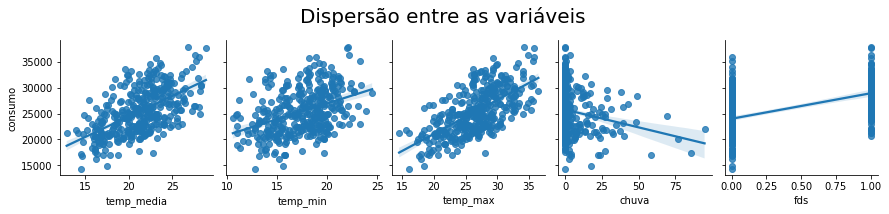

In [16]:
#plotando os gráficos de dispersão com linha de regressão linear, temos:
ax = sns.pairplot(base_dados, y_vars = 'consumo',x_vars = ['temp_media','temp_min','temp_max','chuva','fds'], kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.15)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

O jointplot e lmplot são apenas formas extras de obter as mesmas informações que foram obtidas com o pairplot. O uso dessas ferramentas são opcionais.

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.</p>

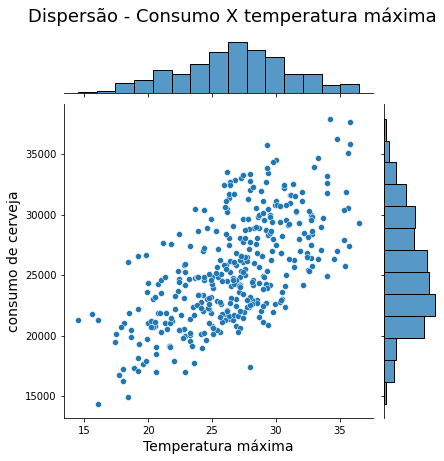

In [17]:
#Plotando o gráfico de dispersão com distribuição de frequência, temos:
ax = sns.jointplot(x = 'temp_max', y = 'consumo',data = base_dados)
ax.fig.suptitle('Dispersão - Consumo X temperatura máxima', fontsize = 18, y = 1.05)
ax.set_axis_labels('Temperatura máxima','consumo de cerveja',fontsize=14)
ax

Note que o gráfico é similiar ao obtido com o método pairplot. A única diferença é que na parte superior é exibido a distribuição de frequência da variável do eixo x e no lado direito é exibido a distribuição de frequência da variável y.

## Plotando um jointplot com a reta de regressão estimada

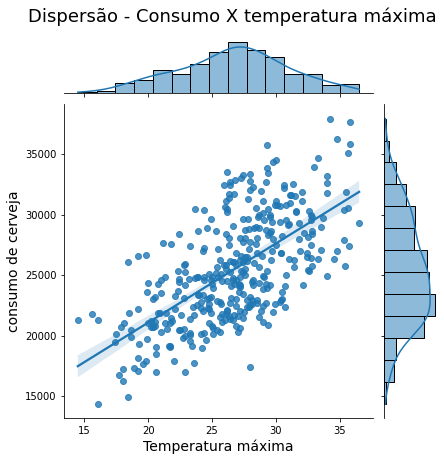

In [18]:
#Plotando o gráfico de dispersão com distribuição de frequência e reta de regressão, temos:
ax = sns.jointplot(x = 'temp_max', y = 'consumo',data = base_dados, kind = 'reg')
ax.fig.suptitle('Dispersão - Consumo X temperatura máxima', fontsize = 18, y = 1.05)
ax.set_axis_labels('Temperatura máxima','consumo de cerveja',fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.</p>

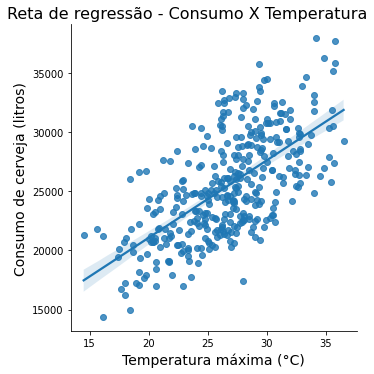

In [19]:
#plotando a reta de regressão entre temperatura máxima e consumo de cerveja, temos:
ax = sns.lmplot(x = 'temp_max',y = 'consumo', data = base_dados)
ax.fig.suptitle('Reta de regressão - Consumo X Temperatura',fontsize = 16, y = 1.02)
ax.set_xlabels('Temperatura máxima (°C)', fontsize = 14)
ax.set_ylabels('Consumo de cerveja (litros)',fontsize = 14)
ax

Observe que o gráfico obtido é bem similar ao obtido anteriormente.

## Plotando um lmplot utilizando uma terceira variável na análise (tipo I)

Uma vantagem adicional do método 'lmplot' é plotar gráficos de dispersão segundo diferentes características. Por exemplo, podemos avaliar a dispersão dos dados de consumo e temperatura máxima segundo a característica de final de semana ou não. Ou seja, na prática vamos agrupar os dados em dados de final de semana e dados de dias úteis e vamos criar dois plots com a dispersão de dados de consumo e temperatura máxima para dois conjuntos de dados diferentes.

Avaliando a dispersão dos dados de consumo e temperatura máxima para os dados de final de semana e dados de dias úteis, temos:

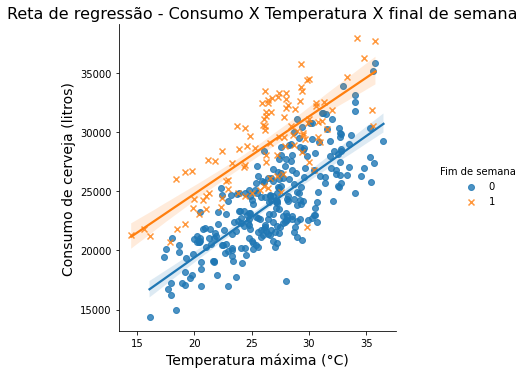

In [20]:
ax = sns.lmplot(x = 'temp_max',y = 'consumo', hue = 'fds', data = base_dados,
                markers = ['o','x'], legend = False)
ax.fig.suptitle('Reta de regressão - Consumo X Temperatura X final de semana',fontsize = 16, y = 1.02)
ax.set_xlabels('Temperatura máxima (°C)', fontsize = 14)
ax.set_ylabels('Consumo de cerveja (litros)',fontsize = 14)
ax.add_legend(title = 'Fim de semana')
ax

A partir desse gráfico, podemos verificar que o consumo de cerveja nos finais de semana são maiores que nos dias úteis. Essa análise foi feita anteriormente utilizando-se boxplots, metodologia mais recomendada. Esse gráfico é apenas uma forma adicional de se chegar à mesma conclusão.

## Plotando um lmplot utilizando uma terceira variável na análise (tipo II)

Caso o gráfico de dispersão apresente uma alta densidade de dados e seja difícil de visualizar, podemos construir gráficos de dispersão separados. Portanto, é possível construir um gráfico de dispersão com os dados de final de semana e outro gráfico de dispersão com os dados de dias úteis.

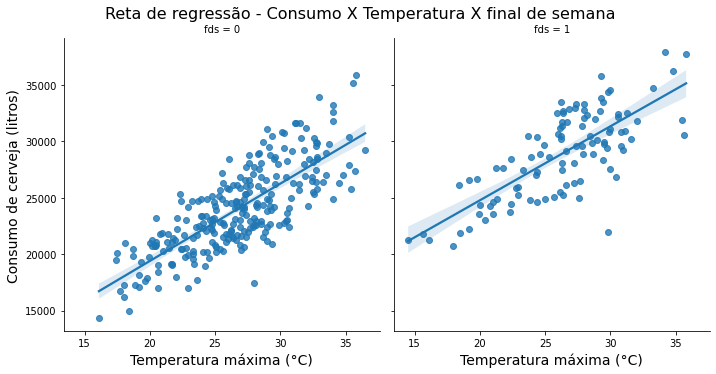

In [21]:
ax = sns.lmplot(x = 'temp_max',y = 'consumo', col = 'fds', data = base_dados,)
ax.fig.suptitle('Reta de regressão - Consumo X Temperatura X final de semana',fontsize = 16, y = 1.02)
ax.set_xlabels('Temperatura máxima (°C)', fontsize = 14)
ax.set_ylabels('Consumo de cerveja (litros)',fontsize = 14)
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regressão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



Para utilização do modelo de regressão linear temos que dividir o conjunto de dados em dados de treinamento, que serão utilizados para a adaptação do modelo de aprendizado de máquina, e dados de teste, utilizados para verificar a eficácia do modelo de aprendizado de máquina. Os dados de teste nos permitem avaliar se o algoritmo de aprendizado de máquina consegue generalizar para outros dados, isto é, se o algoritmo funciona bem para dados que são diferentes dos utilizados no treinamento.

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

O método 'train_test_split' da biblioteca scikit-learn é utilizado para dividir o conjunto de dados em dados de treinamento e dados de teste.

In [22]:
from sklearn.model_selection import train_test_split

Antes de dividir a base de dados em dados de treino e dados de teste, precisamos dividir o dataset em variáveis explicativas e variável objetivo. Portanto, é construidá uma Series para armazenar os valores da variável dependente (objetivo), que no presente caso é o consumo de cerveja, e um DataFrame contendo as variáveis explanatórias (temp_max,chuva,fds).


## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [23]:
#a nomenclatura para a variável dependente é 'y' minúsculo
y = base_dados['consumo']
y.head(10)

0    25461
1    28972
2    30814
3    29799
4    28900
5    28218
6    29732
7    28397
8    24886
9    37937
Name: consumo, dtype: int64

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [24]:
#a nomenclatura para os dados de variáveis explanatórias é 'X' maiúsculo
X = base_dados[['temp_max','chuva','fds']]
X.head(10)

,temp_max,chuva,fds
0,32.5,0.0,0
1,33.5,0.0,0
2,29.9,0.0,1
3,28.6,1.2,1
4,28.3,0.0,0
5,30.5,12.2,0
6,33.7,0.0,0
7,32.8,48.6,0
8,34.0,4.4,0
9,34.2,0.0,1


## Criando os datasets de treino e de teste

Separados os dados em variável dependente 'y' e variáveis explanatórias 'X', vamos dividir o conjunto de dados em dados de treino e dados de teste utilizando o método 'train_test_split' da biblioteca sckit-learn.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2811)

In [26]:
X_train.head(10)

,temp_max,chuva,fds
195,27.6,0.0,0
344,30.3,0.0,0
288,35.7,0.0,0
59,26.3,3.0,1
220,26.2,0.0,1
354,29.1,27.2,0
301,24.8,0.0,0
51,31.1,0.0,1
140,25.0,0.0,0
22,26.1,3.6,0


In [27]:
y_train.head(10)

195    28742
344    30740
288    27387
59     27475
220    33517
354    24834
301    22634
51     30943
140    20786
22     21784
Name: consumo, dtype: int64

In [28]:
X_test.head(10)

,temp_max,chuva,fds
5,30.5,12.2,0
83,27.9,0.0,0
40,29.0,32.2,0
143,26.3,0.0,1
193,28.7,0.0,0
1,33.5,0.0,0
333,23.3,23.4,0
8,34.0,4.4,0
232,22.1,1.0,0
260,34.5,0.0,0


In [29]:
y_test.head(10)

5      28218
83     22401
40     21137
143    31387
193    25640
1      28972
333    20238
8      24886
232    23243
260    26311
Name: consumo, dtype: int64

Significados de cada parâmetro:

A função 'train_test_split' retorna 4 listas, onde as listas são as que aparecem na ordem: X_train (variáveis explanatórias para treinamento), X_test (variáveis explanatórias para teste), y_train (variável dependente para treino) e y_test (variável dependente para teste). Os dados de treinamento X_train e y_train são oriundos do mesmo registro, analogamente o mesmo ocorre com os dados de teste.

**X** e **y** indicam o dataframe e a series contendo as variáveis explanatórias e variável dependente, respectivamente. 

**test_size** recebe o tamanho do conjunto de dados de teste. Definindo test_size = 0.3 estamos estebelecendo que 30% dos dados serão utilizados para o teste e 70% dos dados utilizados para o treinamento do modelo. Em geral, a maior parte dos dados é utilizada para o treinamento do modelo de aprendizado de máquina. 

**random_state** é utilizado para estebelecer que os dados obtidos na divisão serão sempre iguais, isso nos permite comparar desempenhos de modelos utilizando os mesmos dados de treinamento e teste.



## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [30]:
X_train.shape

(255, 3)

In [31]:
y_train.shape

(255,)

In [32]:
X_test.shape

(110, 3)

In [33]:
y_test.shape

(110,)

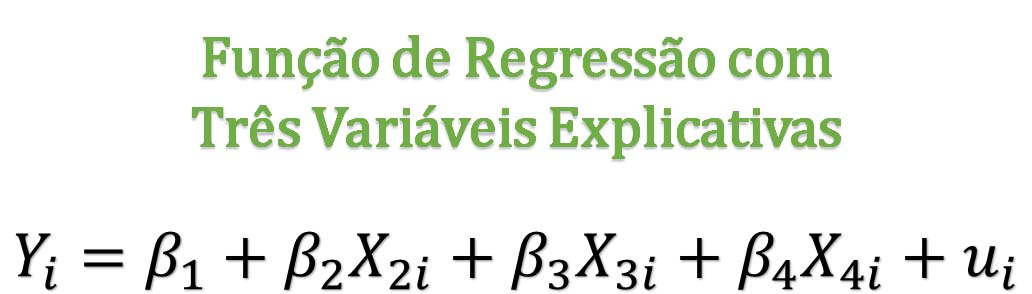

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

metrics contém um conjunto de métodos que serão utilizados para estimar o quão bom é o nosso modelo de aprendizado de máquina. Portanto, iremos construir um modelo de regressão linear para estimar o consumo médio de cerveja a partir de variáveis explicativas de temperatura máxima, quantidade de chuva e dia da semana . Em seguida, vamos testar e avaliar o nosso modelo utilizando um conjunto de métricas.

## Instanciando a classe *LinearRegression()*

In [35]:
#criando o objeto LinearRegression()
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [36]:
#treinando o modelo de regressão linear com os dados de treinamento, temos:
modelo.fit(X_train,y_train)

LinearRegression()

O treinamento utiliza os dados fornecidos de variáveis explicativas e variável dependente para construir uma reta de regressão com o mesmo formato da função apresentada na imagem logo acima. O treinamento consiste no ajuste dos coeficientes e demais parâmetros da reta de regressão, que será utilizada para fazer estimações da variável dependente.

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [37]:
#calculando o coeficiente de determinação, temos:
print('R²: {}'.format(modelo.score(X_train,y_train).round(4)))

R²: 0.7336


Considerando que temos poucas variáveis e poucos dados, o reultado obtido de coeficiente de determinação indica que o nosso modelo de regressão linear é razoável para estimação do consumo. Um modelo ótimo é aquele que consegue se aproximar de R² = 1.

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

Neste momento, queremos saber se o modelo treinado é capaz de fazer generalizações, isto é, prever a variável dependente com dados que são diferentes dos utilizados para treinamento.

In [38]:
#O comando abaixo gera estimativas de y a partir dos dados de teste das variáveis explanatórias.
y_previsto = modelo.predict(X_test)

Esses dados de y_previsto podem ser comparados com os dados reais pra estimar o quão o algoritmo é capaz de fazer estimativas, se as estimativas são boas ou não.

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

Agora vamos comparar os dados de y previstos com os dados de y verdadeiros.

In [39]:
print('R²: {}'.format(metrics.r2_score(y_test,y_previsto).round(4)))

R²: 0.6907


Podemos construir um gráfico de dispersão para verificar visualmente o comportamento das variáveis 'y_previsto' e 'y_test':

In [40]:
valores_y = pd.DataFrame({'y_test':y_test,'y_previsto':y_previsto})
valores_y.reset_index(inplace = True)

In [41]:
valores_y.columns

Index(['index', 'y_test', 'y_previsto'], dtype='object')

In [42]:
valores_y.drop('index', axis = 'columns',inplace = True)
valores_y.head(10)

,y_test,y_previsto
0,28218,26094.901775
1,22401,25056.131915
2,21137,23852.147927
3,31387,29361.636439
4,25640,25603.921322
5,28972,28890.657765
6,20238,20484.033833
7,24886,28965.583429
8,23243,21023.876277
9,26311,29575.394524


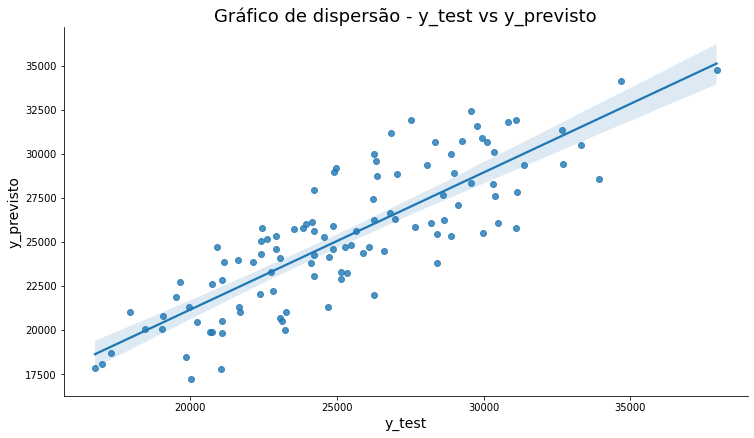

In [43]:
#Construindo um gráfico de dispersão, temos:
ax = sns.lmplot(x = 'y_test',y = 'y_previsto', data = valores_y)
ax.figure.set_size_inches(12,6)
plt.title('Gráfico de dispersão - y_test vs y_previsto', fontsize = 18)
plt.ylabel('y_previsto', fontsize = 14)
plt.xlabel('y_test', fontsize = 14)
#ax.set_yticks([i for i in range(0,20,1)])
ax

# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [44]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


## Gerando previsão pontual

In [45]:
modelo.predict(entrada)[0]

26094.901775262017

## Criando um simulador simples

Um dono de bar da região pode querer estimar a quantidade de cerveja que vai ser consumida em um dia a partir de informações meteorológicas de previsão do tempo. Uma aplicação simples pra estimar o consumo de cerveja em um determinado dia é dado abaixo:

In [46]:
temp_max = 30.5 #temperatura máxima que deve ser registrada naquele dia
chuva = 12.2 
fds = 0

entrada = [[temp_max,chuva,fds]]

print('{} litros'.format(modelo.predict(entrada)[0].round(2)))

26094.9 litros


In [47]:
temp_max = float(input('Temperatura máxima do dia (°C): '))
chuva = float(input('Precipitação prevista (mm): '))
fds = float(input('É um final de semana? (0:não/1:sim): '))

entrada = [[temp_max,chuva,fds]]

print('{} litros'.format(modelo.predict(entrada)[0].round(2)))

Temperatura máxima do dia (°C): 30.5
Precipitação prevista (mm): 12.2
É um final de semana? (0:não/1:sim): 0
26094.9 litros


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

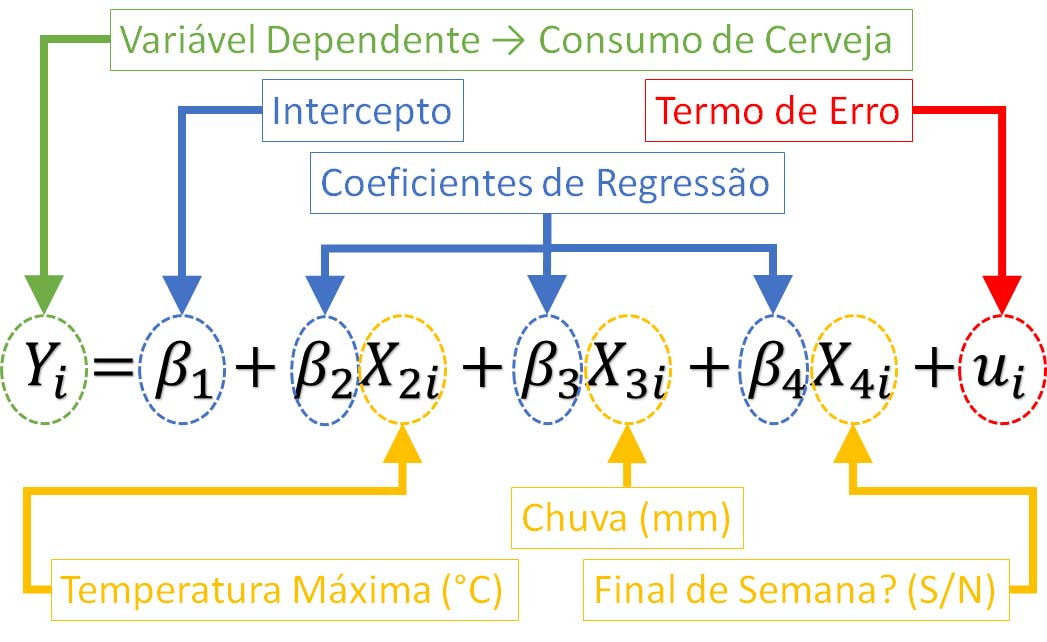

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [48]:
#obtendo o intercepto do nosso modelo de regressão linear obtido, temos:
modelo.intercept_

5951.976339312445

In [49]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [50]:
#visualizando os coeficientes das variáveis 'temp_max', 'chuva' e 'fds', temos:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [51]:
type(modelo.coef_)

numpy.ndarray

## Confirmando a ordem das variáveis explicativas no DataFrame

In [52]:
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [54]:
indice  = ['Intercepto','Temperatura máxima','Chuva (mm)','Final de semana']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [55]:
parametros = pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = indice, columns = ['Parâmetros'])
parametros

,Parâmetros
Intercepto,5951.976339
Temperatura máxima,684.736759
Chuva (mm),-60.782435
Final de semana,5401.083339


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [57]:
#Fazendo previsões com o modelo de regressão linear, utilizando os dados usados no treinamento do modelo, temos:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Agora, vamos fazer um gráfico de dispersão para comparar os dados de consumo de cerveja (variável dependente) previstos com o modelo e os dados reais. O gráfico de dispersão nos fornece uma análise visual do desempenho do modelo na predição de valores para a variável dependente. Um bom modelo deve apresentar um gráfico de dispersão bem ajustado a reta da diagonal.

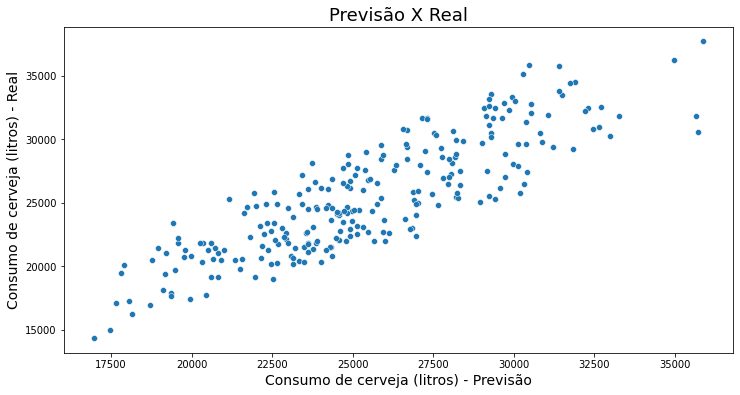

In [58]:
ax = sns.scatterplot(x = y_previsto_train, y = y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real',fontsize = 18)
ax.set_xlabel('Consumo de cerveja (litros) - Previsão',fontsize = 14)
ax.set_ylabel('Consumo de cerveja (litros) - Real',fontsize = 14)
ax

No gráfico de dispersão, é possível visualizar que os dados parecem estar bem ajustados a uma reta para valores baixos de consumo e, a medida que os dados de consumo aumentam, os pontos vão se afastando da reta. Para valores altos de consumo, parece que o modelo de regressão linear diminui o desempenho na estimação de valores de consumo. Ou seja, parece que o aumento no consumo de cerveja estimado é acompanhado por um aumento nos resíduos (erros).

## Obtendo os resíduos

Como vimos na fórmula da regressão linear, temos os seguintes parâmetros: intercepeto, coeficiente angular associados às variáveis explicativas e, por último, um termo de erro, também denominado de resíduo. Na fórmula matemática, contendo o resíduo, o y (variável dependente) representa o valor real da variável. O intercepto e as variáveis explicativas, juntamente com os coeficientes associados, representam o valor previsto da variável dependente, estimado com o modelo treinado de regressão linear.

$Resíduo = y real - y previsto$

O resíduo é, portanto, a diferença entre o valor real da variável e o valor previsto com o modelod e regressão linear.

No presente caso, temos os seguintes valores de resíduos para o modelo de estimação do consumo de cerveja:

In [60]:
#Residuos entre valor real e previsto
residuo = y_train - y_previsto_train
residuo

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

Quando utilizamos o modelo de regressão linear, a variância dos resíduos do modelo deve ser constante, pois estatísticas mais formais exigem que tal critério de homocedasticidade seja satisfeito.

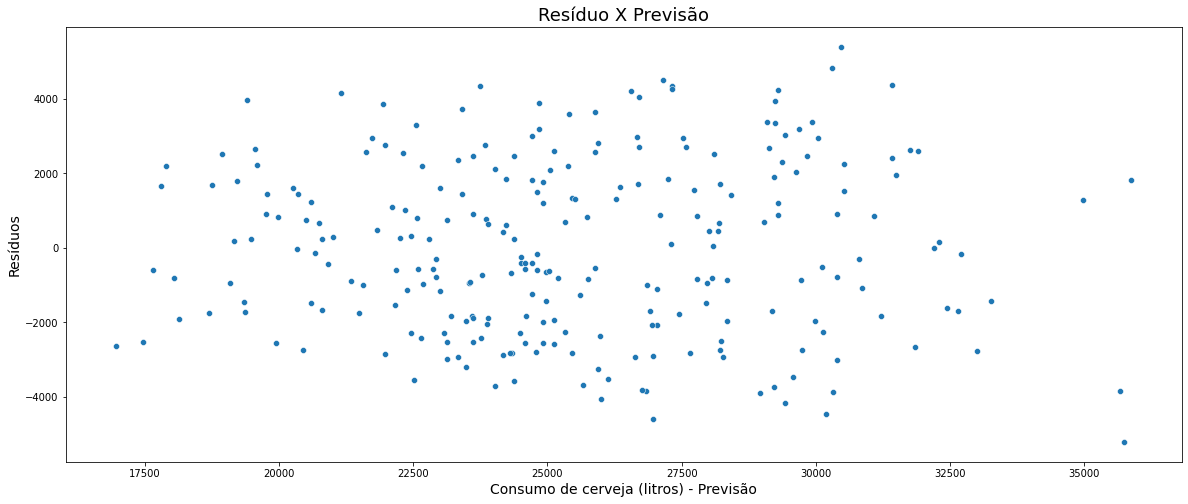

In [63]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo)
ax.figure.set_size_inches(20,8)
ax.set_title('Resíduo X Previsão',fontsize = 18)
ax.set_xlabel('Consumo de cerveja (litros) - Previsão',fontsize = 14)
ax.set_ylabel('Resíduos',fontsize = 14)
ax

Como identificamos anteriormente no gráfico de dispersão da variável real versus variável prevista, a variância dos resíduos aumenta conforme o consumo de cerveja aumenta.

## Utilizando os resíduos ao quadrado

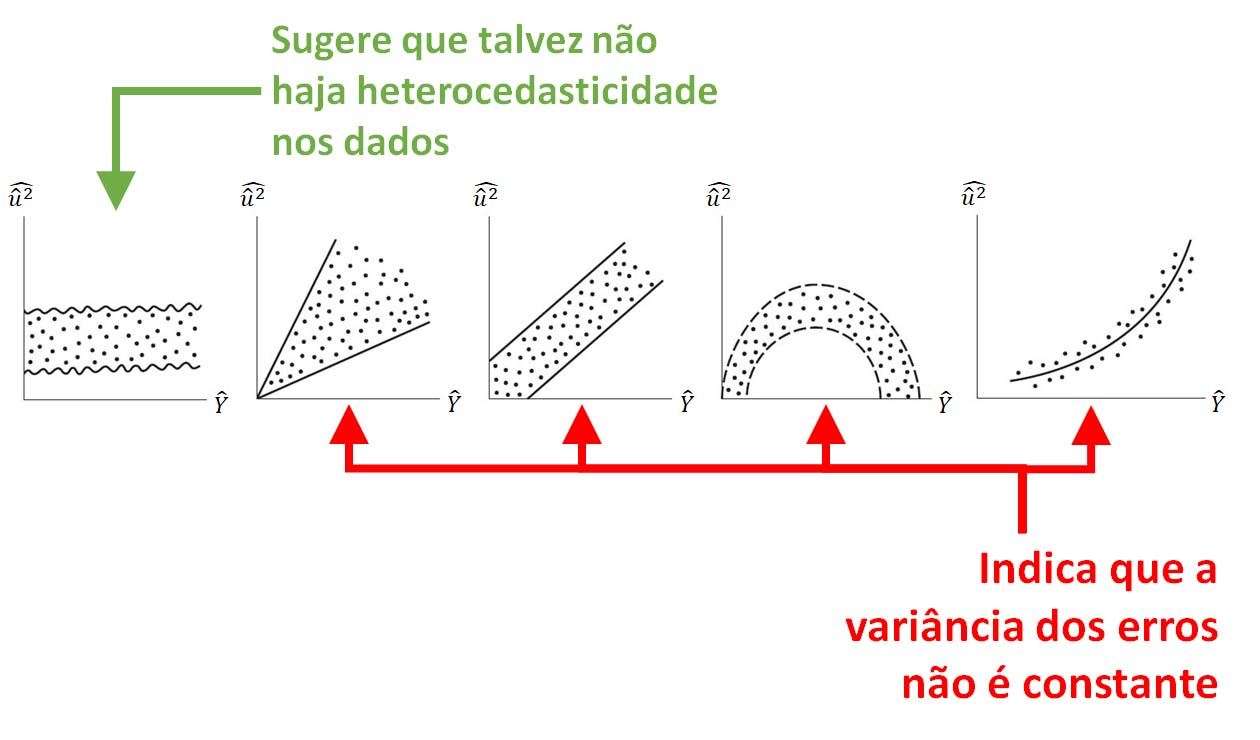
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

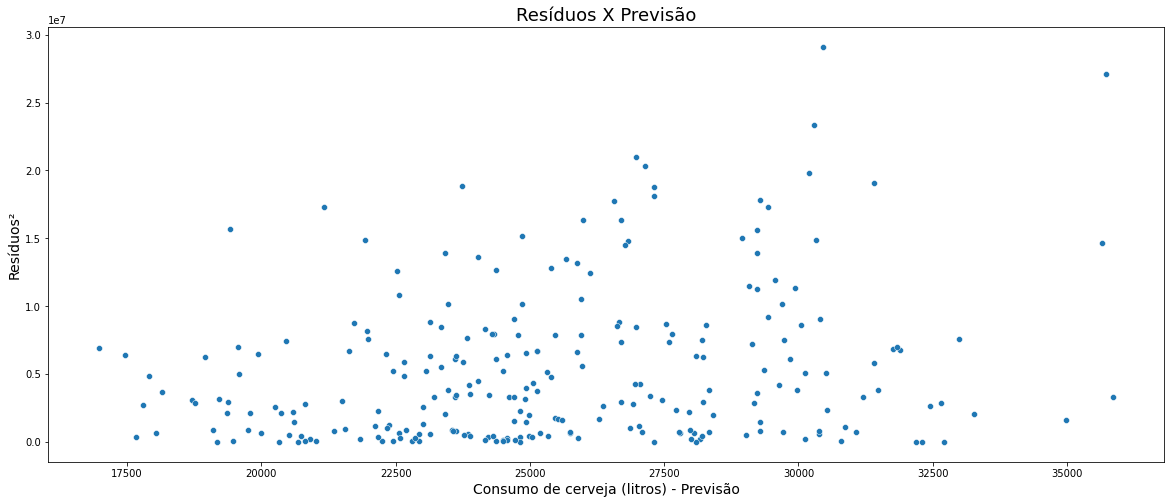

In [64]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2)
ax.figure.set_size_inches(20,8)
ax.set_title('Resíduos X Previsão',fontsize = 18)
ax.set_xlabel('Consumo de cerveja (litros) - Previsão',fontsize = 14)
ax.set_ylabel('Resíduos²',fontsize = 14)
ax

A partir do gráfico de dispersão utilizando os quadrados dos resíduos, podemos verificar que a variância dos resíduos não é constante. Tal comportamento do gráfico se assemelha ao observado no segundo gráfico da figura acima, com o quadrado dos resíduos aumentando com o aumento da variável dependente y.

## Plotando a distribuição de frequências dos resíduos

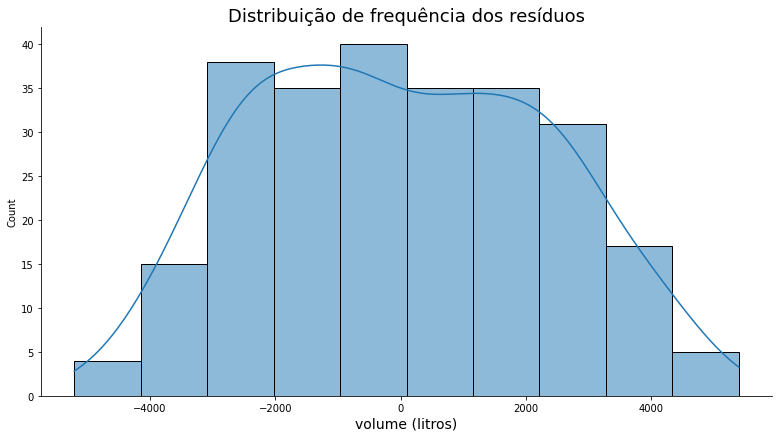

In [66]:
#Construindo um histograma para observação da distribuição dos dados de resíduos:
ax = sns.displot(residuo,kind = 'hist',kde = True)
ax.figure.set_size_inches(12,6)
plt.title('Distribuição de frequência dos resíduos', fontsize = 18)
plt.xlabel('volume (litros)', fontsize = 14)
ax

A partir da distribuição de frequências dos resíduos, podemos observar a distribuição dos dados de resíduos.

Como os dados são obtidos de uma série temporal, ou seja, dados coletados ao longo do ano, poderíamos plotar um gráfico de resíduos ao longo do ano para verificar se os resíduos são influenciados pelo tempo.

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

Neste momento, vamos comparar modelos de algoritmos de regressão linear. Ao longo do trabalho como cientista de dados, serão apresentados conjuntos de dados com várias características à serem analisadas. Em muitos trabalhos, será necessário testar conjuntos diferentes de características para verificar qual conjunto explica melhor as variações na variável dependente, devendo ser utilizado no treinamento e implementação do algoritmo de machine learning. 

## Estimando um novo modelo com a substituição da variável explicativa 'Temperatura Máxima' pela 'Temperatura Média'

Para estimar um novo modelo precisamos treinar um novo modelo modificando apenas as características explicativas utilizadas. Seguindo os passos que já foram apresentados no início do trabalho, temos:

In [67]:
base_dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [68]:
#criando um DataFrame para armazenar as novas variáveis explicativas, temos:

X1 = base_dados[['temp_media','chuva','fds']]
X1.head(10)

,temp_media,chuva,fds
0,27.30,0.0,0
1,27.02,0.0,0
2,24.82,0.0,1
3,23.98,1.2,1
4,23.82,0.0,0
5,23.78,12.2,0
6,24.00,0.0,0
7,24.90,48.6,0
8,28.20,4.4,0
9,26.76,0.0,1


## Criando os datasets de treino e de teste

In [69]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size = 0.3, random_state = 2811)

## Instanciando a classe *LinearRegression()*

In [72]:
#criando o objeto do tipo LinearRegression, temos:
modelo2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [74]:
#treinando o novo modelo, temos:
modelo2.fit(X1_train,y1_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado, usando os dados de treinamento, e comparando com o resultado do modelo anterior

In [76]:
print('Modelo com temperatura máxima')

#calculando o coeficiente de determinação, temos:
print('R²: {}'.format(modelo.score(X_train,y_train).round(4)))

Modelo com temperatura máxima
R²: 0.7336


In [75]:
print('Modelo com temperatura média')

#calculando o coeficiente de determinação, temos:
print('R²: {}'.format(modelo2.score(X1_train,y1_train).round(4)))

Modelo com temperatura média
R²: 0.6618


Quanto mais R² estiver próximo de 1 melhor o desempenho do modelo de regressão linear. Como é possível observar, o coeficiente de determinação caiu de 0.73 para 0.66 com a substituição da variável explicativa 'temperatura máxima' por 'temperatura média'. O que sugere que o conjunto de variáveis explicativas ['temp_maxima','chuva','fds'] é melhor que o conjunto de variáveis ['temp_media','chuva','fds'].

## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [77]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo2.predict(X1_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [79]:
print('Modelo com temperatura média')

#calculando o coeficiente de determinação, temos:
print('R²: {}'.format(metrics.r2_score(y1_test,y_previsto_2).round(2)))

Modelo com temperatura média
R²: 0.66


In [80]:
print('Modelo com temperatura máxima')

#calculando o coeficiente de determinação, temos:
print('R²: {}'.format(metrics.r2_score(y_test,y_previsto).round(2)))

Modelo com temperatura máxima
R²: 0.69


Os dados de coeficientes de determinação (R²) obtidos para as previsões de ambos os modelos, a partir dos dados de teste, indicam que o modelo utilizando temperatura máxima explica melhor as variações na variável dependente y.

# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [83]:
#calculando o erro quadrático médio entre y verdadeiro e y previsto usando os dados de teste, temos:
EQM_2 = metrics.mean_squared_error(y1_test,y_previsto_2).round(2) 
#calculando a raiz quadrada do erro quadrático médio, temos:
REQM_2 = np.sqrt(metrics.mean_squared_error(y1_test,y_previsto_2)).round(2)
#Calculando o coeficiente de determinação R², temos:
R2_2 = metrics.r2_score(y1_test,y_previsto_2).round(2)

#criando um dataframe contendo as métricas do modelo, temos:
metricas_modelo2 = pd.DataFrame([EQM_2,REQM_2,R2_2],['Erro quadrático médio','Raiz erro quadrático médio','R²'], columns = ['Métricas de desempenho'])

metricas_modelo2

,Métricas de desempenho
Erro quadrático médio,6060775.46
Raiz erro quadrático médio,2461.86
R²,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [85]:
#calculando o erro quadrático médio entre y verdadeiro e y previsto usando os dados de teste, temos:
EQM_1 = metrics.mean_squared_error(y_test,y_previsto).round(2) 
#calculando a raiz quadrada do erro quadrático médio, temos:
REQM_1 = np.sqrt(metrics.mean_squared_error(y_test,y_previsto)).round(2)
#Calculando o coeficiente de determinação R², temos:
R2_1 = metrics.r2_score(y_test,y_previsto).round(2)

#criando um dataframe contendo as métricas do modelo, temos:
metricas_modelo = pd.DataFrame([EQM_1,REQM_1,R2_1],['Erro quadrático médio','Raiz erro quadrático médio','R²'], columns = ['Métricas de desempenho'])

metricas_modelo

,Métricas de desempenho
Erro quadrático médio,5471976.38
Raiz erro quadrático médio,2339.23
R²,0.69


Comparando os valores das métricas, podemos concluir que o modelo usando a temperatura máxima como variável explicativa, ao invés da temperatura média, apresenta erro quadrático médio menor e coeficiente de determinação R² mais próximo de 1. Tal modelo é considerado o mais adequado e deverá apresentar desempenho superior.

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [86]:
X_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [52]:
entrada = X_test[0:1]

## Gerando previsão pontual

In [89]:
modelo.predict(entrada)[0].round(3)

26094.902

## Criando um simulador simples

In [92]:
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max,chuva,fds]]
print('{} litros'.format(modelo.predict(entrada)[0].round(2)))

26094.9 litros


## Salvando o modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O módulo <b>pickle</b> implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.</p>

In [94]:
import pickle

In [95]:
output = open('modelo_consumo_cerveja','wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveja','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```